In [1]:
import numpy as np
import nibabel as nib
import os
import matplotlib.pyplot as plt

In [11]:
seg_path = r'N:\2_Analysis\automated_analysis\Flint_SOT_EOT_volume\nii files\FLINT_SOT_WHOLE_LIVER_MASKS_NII'
output_path = r'N:\2_Analysis\automated_analysis\Flint_SOT_EOT_volume\nii files\FLINT_SOT_WHOLE_LIVER_MASKS_NII'

In [12]:
case_id = []

for root, dirs, files in os.walk(seg_path):
    for file in files:
        if file.endswith('.nii'):
            patient = file[:6]
            case_id.append(patient)
    

In [13]:
case_id[:5], len(case_id)

(['f_2421', 'f_2422', 'f_2423', 'f_2429', 'f_2433'], 82)

In [15]:
for i in case_id:
    case_path = os.path.join(seg_path, i + '_edited.nii')
    
    seg_ni = nib.load(case_path)

    seg_np = seg_ni.get_fdata()
    
    whole_np = np.zeros((seg_np.shape[0], seg_np.shape[1], seg_np.shape[2]))
    
    whole_np[seg_np != 0] = 1
    
    img = nib.Nifti1Image(whole_np, seg_ni.affine)
    nib.save(img, os.path.join(output_path, i + '_whole_liver_mask.nii'))

In [4]:
case_id = 'f_2421'

seg_path = r'N:\2_Analysis\automated_analysis\Flint_SOT_EOT_volume\nii files\FLINT_SOT_WHOLE_LIVER_MASKS_NII'
output_path = r'N:\2_Analysis\automated_analysis\Flint_SOT_EOT_volume\nii files\FLINT_SOT_WHOLE_LIVER_MASKS_NII'

case_path = os.path.join(seg_path, case_id + '_edited.nii')

In [5]:
seg_ni = nib.load(case_path)

seg_np = seg_ni.get_fdata()

seg_np.shape

(224, 224, 26)

<function matplotlib.pyplot.show(close=None, block=None)>

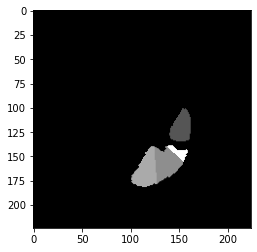

In [7]:
plt.imshow(seg_np[:,:,15],cmap='gray')
plt.show

In [8]:
whole_np = np.zeros((seg_np.shape[0], seg_np.shape[1], seg_np.shape[2]))
whole_np.shape

(224, 224, 26)

In [9]:
whole_np[seg_np != 0] = 1

<function matplotlib.pyplot.show(close=None, block=None)>

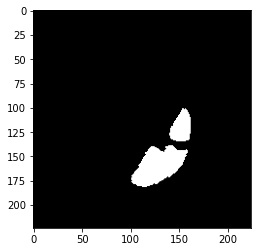

In [10]:
plt.imshow(whole_np[:,:,15],cmap='gray')
plt.show

In [75]:
img = nib.Nifti1Image(whole_np, seg_ni.affine)
nib.save(img, os.path.join(output_path, case_id + '.nii'))